<a href="https://colab.research.google.com/github/TimkaThymineTimiryazevskaya/sf_data_science/blob/main/Bagging_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor

In [16]:
df = pd.read_csv('wineQualityReds.zip')

In [18]:
df['target']= np.where(df.quality >=6,1,0)
Y= df['target']
X = df.drop(['target', 'quality'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
print(f1_score(preds_test, y_test))
model = DecisionTreeClassifier(max_depth = 10, random_state=42)
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
print(f1_score(preds_test, y_test))

0.7390476190476191
0.7601476014760148


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 10, random_state=42), n_estimators=1500, random_state=42).fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
f1_score(preds_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8239700374531835

In [43]:
df = pd.read_csv('boston__1_.zip')
df = df.replace(',','.', regex=True).astype(float)
Y= df['target']
X = df.drop(['target'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=13)
y_train.mean()

22.77316384180791

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
print(mean_absolute_error(preds_test, y_test))

3.722279395856134


In [59]:
model = DecisionTreeRegressor(random_state=13)
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
print(mean_absolute_error(y_train, preds_train))
print(mean_absolute_error(y_test, preds_test))

0.0
2.8388157894736845


In [62]:
n = [3, 10, 100, 500]
for i in n:
  model = RandomForestRegressor(n_estimators = i,random_state = 13)
  model.fit(X_train, y_train)
  preds_test = model.predict(X_test)
  print(mean_absolute_error(y_test, preds_test))

2.9328947368421057
2.466315789473684
2.2559736842105265
2.2365657894736892


In [88]:
df = pd.read_csv('weatherAUS.zip')
df.isna().sum()/df.count()*100


Date              0.000000
Location          0.000000
MinTemp           1.031429
MaxTemp           0.874486
Rainfall          2.293265
Evaporation      75.952583
Sunshine         92.343802
WindGustDir       7.641304
WindGustSpeed     7.591145
WindDir9am        7.832817
WindDir3pm        2.993656
WindSpeed9am      1.229705
WindSpeed3pm      2.150311
Humidity9am       1.858465
Humidity3pm       3.197520
Pressure9am      11.553357
Pressure3pm      11.521712
Cloud9am         62.394498
Cloud3pm         68.939165
Temp9am           1.229705
Temp3pm           2.544219
RainToday         2.293265
RainTomorrow      2.297581
dtype: float64

In [89]:

df_new = df.drop(['Evaporation', 'Sunshine', 'Cloud3pm'], axis =1)
df_new.isna().sum().sum()-df.isna().sum().sum()

-191983

In [90]:
df_new.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df_new.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})
df_new.RainToday.mean()

0.22419285648984874

In [91]:
df = df_new
df.Date = pd.to_datetime(df.Date)
df['Month'] = df.Date.dt.month
df.drop('Date', axis = 1, inplace = True)
df_season = df.groupby('Month').mean(numeric_only=True)
df_season[['RainToday']]

,RainToday
Month,
1,0.189484
2,0.206746
3,0.217135
4,0.216845
5,0.222163
6,0.263638
7,0.270736
8,0.253167
9,0.229135


In [92]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df = pd.get_dummies(data = df, columns = categoricals)


In [93]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0


In [94]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 124 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(15), uint8(109)
memory usage: 31.8 MB


In [104]:
df = df.dropna(axis = 0)
X = df.drop(['RainTomorrow'], axis = 1)
Y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=31)
y_train.mean()

0.22713083480895963

In [105]:
def gbs(data, n):
    inds = np.random.randint(0, len(data), (n, len(data))) #определяем индексы случайным образом
    numbers = data[inds] #выбираем значения по индексам
    return numbers
target = X_train['MinTemp'].values #выбираем целевую переменную
np.random.seed(31) #задаём параметр генератора случайных чисел
mean_values = [np.mean(x) for x in gbs(target, 1000)] #получаем все средние значения
np.std(mean_values) #находим для них стандартное отклонение

0.02879072820657669

In [106]:
from sklearn.metrics import roc_auc_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(roc_auc_score(y_pred, y_test))

0.7972465340447032


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_leaf_nodes': list(range(2, 10)),
    'min_samples_split': [2, 3, 4],
    'max_depth': [5,7,9,11]
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=3, cv=3)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)

clf = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 2, min_samples_split = 2, random_state=42)
clf.fit(X_train, y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)
print(round(roc_auc_score(y_test, preds_test), 2))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=2;, score=0.817 total time=   0.1s
[CV 2/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=2;, score=0.820 total time=   0.1s
[CV 3/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=2;, score=0.825 total time=   0.1s
[CV 1/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=3;, score=0.817 total time=   0.1s
[CV 2/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=3;, score=0.820 total time=   0.1s
[CV 3/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=3;, score=0.825 total time=   0.1s
[CV 1/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=4;, score=0.817 total time=   0.1s
[CV 2/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=4;, score=0.820 total time=   0.1s
[CV 3/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=4;, score=0.825 total time=   0.1s
[CV 1/3] END max_depth=5, max_leaf_nodes=3, min_samples_split=2;,

In [108]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, random_state=31)
clf.fit(X_train, y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)
print(round(roc_auc_score(y_test, preds_test), 2))

0.73


In [109]:
params = {
    'max_features': [4, 5, 6, 7],
    'min_samples_leaf': [3, 5, 7, 9, 11],
    'max_depth': [5, 10, 15]
}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=31), params, verbose=3, cv=3)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
clf = RandomForestClassifier(max_depth=15, max_features=7, min_samples_leaf=3, random_state=31)
clf.fit(X_train, y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)
print(round(roc_auc_score(y_test, preds_test), 2))

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.776 total time=   1.3s
[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.775 total time=   1.6s
[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.775 total time=   1.4s
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.776 total time=   1.2s
[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.775 total time=   1.2s
[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.775 total time=   1.2s
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.776 total time=   1.1s
[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.775 total time=   1.2s
[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.775 total time=   1.2s
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=9;, score=0.776 total time=   1.1

In [111]:
feature_names = [x for x in df if x != 'RainTomorrow']
pd.DataFrame({'feat': feature_names,
              'coef': clf.feature_importances_}).sort_values(by='coef', ascending=False)

,feat,coef
7,Humidity3pm,0.250783
2,Rainfall,0.079757
6,Humidity9am,0.070403
10,Cloud9am,0.067092
9,Pressure3pm,0.065272
...,...,...
50,Location_Newcastle,0.000000
62,Location_SalmonGums,0.000000
51,Location_Nhil,0.000000
52,Location_NorahHead,0.000000


In [112]:
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [147]:
df = pd.read_csv('AirPass.zip')
df.isna().sum().sum()

310

In [148]:
df = df.fillna(df.median())
df.head()

<ipython-input-148-abfaba4eaad7>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [149]:
df.isna().sum().sum()

0

In [116]:
df['Arrival Delay in Minutes'].mean()

15.133392362180475

<Axes: xlabel='Gender', ylabel='satisfaction'>

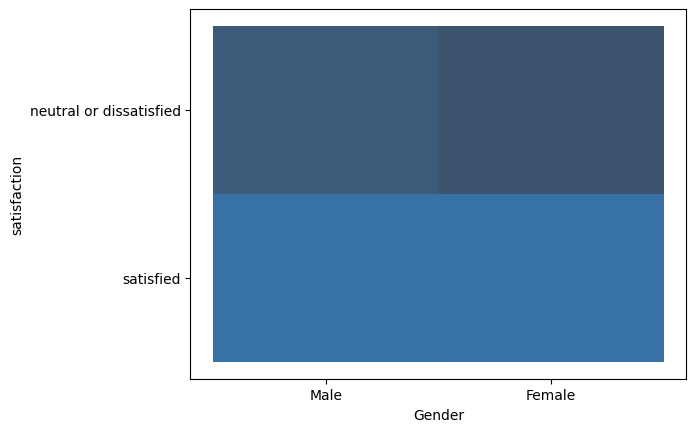

In [124]:
import seaborn as sns
sns.histplot(df, x = 'Gender',  y = 'satisfaction', binwidth = 5)

In [125]:
df.groupby('Gender')['satisfaction'].value_counts()*100/df.shape[0]

Gender  satisfaction           
Female  neutral or dissatisfied    29.058554
        satisfied                  21.687327
Male    neutral or dissatisfied    27.608177
        satisfied                  21.645942
Name: satisfaction, dtype: float64

In [128]:
df.groupby('Type of Travel')['satisfaction'].value_counts()*100/df.shape[0]

Type of Travel   satisfaction           
Business travel  satisfied                  40.177472
                 neutral or dissatisfied    28.785225
Personal Travel  neutral or dissatisfied    27.881506
                 satisfied                   3.155798
Name: satisfaction, dtype: float64

In [129]:
df.groupby('Class')['satisfaction'].value_counts()*100/df.shape[0]

Class     satisfaction           
Business  satisfied                  33.184478
          neutral or dissatisfied    14.614452
Eco       neutral or dissatisfied    36.614567
          satisfied                   8.374076
Eco Plus  neutral or dissatisfied     5.437712
          satisfied                   1.774715
Name: satisfaction, dtype: float64

In [150]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df = df.drop(['Unnamed: 0'], axis = 1)

In [151]:
df.isna().sum().sum()

0

In [152]:
df_dummies = pd.get_dummies(df)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int64  
 2   Customer Type                      103904 non-null  int64  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [159]:
X = df_dummies.drop(['satisfaction'], axis = 1)
Y = df['satisfaction']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=26)
X_test.shape[0]

20781

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test[0][0]

0.9408251379303

In [162]:
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_train)
y_pred1 = model.predict(X_test)
print(f1_score(y_pred, Y_train))
print(f1_score(y_pred1, Y_test))

0.8538275813094731
0.8546883773161146


In [163]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(estimator = DecisionTreeClassifier(random_state = 26), random_state = 26, learning_rate = 0.01)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
f1_score(y_pred, Y_test)

0.9404794558121674

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
model_for_gs = GradientBoostingClassifier()
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
gs = GridSearchCV(model_for_gs,
                  params,
                  cv=3,
                  scoring=make_scorer(f1_score),
                  verbose=5)

gs.fit(X_train, Y_train)

print("Лучшие гиперпараметры:", gs.best_params_)
print("Лучшее значение метрики:", gs.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END .learning_rate=1.0, n_estimators=1;, score=0.873 total time=   0.2s
[CV 2/3] END .learning_rate=1.0, n_estimators=1;, score=0.870 total time=   0.2s
[CV 3/3] END .learning_rate=1.0, n_estimators=1;, score=0.871 total time=   0.2s
[CV 1/3] END .learning_rate=1.0, n_estimators=2;, score=0.880 total time=   0.4s
[CV 2/3] END .learning_rate=1.0, n_estimators=2;, score=0.878 total time=   0.3s
[CV 3/3] END .learning_rate=1.0, n_estimators=2;, score=0.875 total time=   0.3s
[CV 1/3] END .learning_rate=1.0, n_estimators=4;, score=0.901 total time=   0.7s
[CV 2/3] END .learning_rate=1.0, n_estimators=4;, score=0.896 total time=   0.7s
[CV 3/3] END .learning_rate=1.0, n_estimators=4;, score=0.897 total time=   0.7s
[CV 1/3] END .learning_rate=1.0, n_estimators=8;, score=0.920 total time=   1.2s
[CV 2/3] END .learning_rate=1.0, n_estimators=8;, score=0.920 total time=   1.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=8;

In [168]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state=26)
model_xgb.fit(X_train,Y_train)
preds_test = model_xgb.predict(X_test)
f1_score(preds_test, Y_test)


0.9573723114544546

In [171]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(random_state=26)
model.fit(X_train, Y_train)
preds_class = model.predict(X_test)
f1_score(preds_class, Y_test)

Learning rate set to 0.068023
0:	learn: 0.6018110	total: 92.5ms	remaining: 1m 32s
1:	learn: 0.5020759	total: 112ms	remaining: 55.8s
2:	learn: 0.4472436	total: 131ms	remaining: 43.4s
3:	learn: 0.4028708	total: 150ms	remaining: 37.3s
4:	learn: 0.3674776	total: 167ms	remaining: 33.3s
5:	learn: 0.3397880	total: 185ms	remaining: 30.7s
6:	learn: 0.3121199	total: 207ms	remaining: 29.4s
7:	learn: 0.2917489	total: 241ms	remaining: 29.9s
8:	learn: 0.2749032	total: 283ms	remaining: 31.2s
9:	learn: 0.2575190	total: 323ms	remaining: 32s
10:	learn: 0.2473699	total: 362ms	remaining: 32.5s
11:	learn: 0.2377539	total: 382ms	remaining: 31.4s
12:	learn: 0.2279313	total: 402ms	remaining: 30.5s
13:	learn: 0.2212511	total: 426ms	remaining: 30s
14:	learn: 0.2100359	total: 446ms	remaining: 29.3s
15:	learn: 0.2025731	total: 467ms	remaining: 28.7s
16:	learn: 0.1942298	total: 484ms	remaining: 28s
17:	learn: 0.1877932	total: 507ms	remaining: 27.7s
18:	learn: 0.1832383	total: 527ms	remaining: 27.2s
19:	learn: 0.17

0.9598221728257851

In [188]:
!pip install catboost
from catboost import get_confusion_matrix
from catboost import Pool
cm = get_confusion_matrix(model, Pool(X_train, Y_train))

ImportError: ignored

In [189]:
pd.DataFrame(
    {
        "feature_importance": model.get_feature_importance(),
        "feature_names": df.drop(columns="satisfaction").columns,
    }
).sort_values(by=["feature_importance"], ascending=False)

ValueError: ignored